# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [169]:
def draw_points(points,save=False,title=''):
    vis = Visualizer()
    vis.add_title(title)
    vis.add_grid()
    vis.add_point(points, s=30, color='green')
    vis.show()
    if save: vis.save(title)

In [102]:
def draw_line(points_left, points_mid, points_right,title=''):
    vis = Visualizer()
    vis.add_title(title)
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [103]:
def draw_example():
    vis = Visualizer()
    vis.add_grid()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

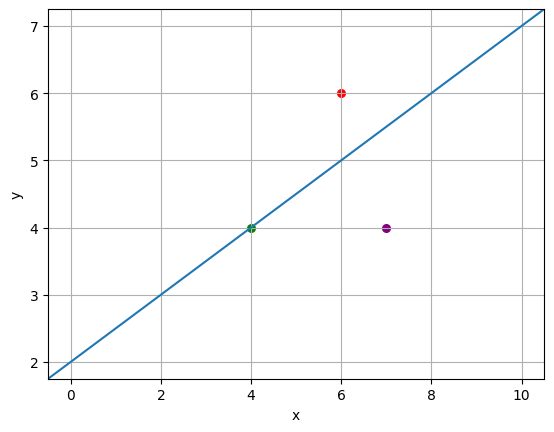

In [104]:
draw_example()

Do tego celu potrzebujemy wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

In [105]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    from random import uniform
    points = []
    for _ in range(n):
        points.append((uniform(left,right), uniform(left,right)))
    return points

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [106]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

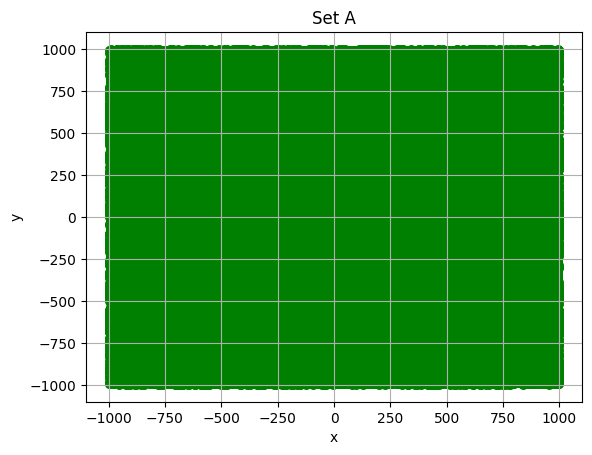

In [170]:
draw_points(points_a, save=True, title='Set A')

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [108]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

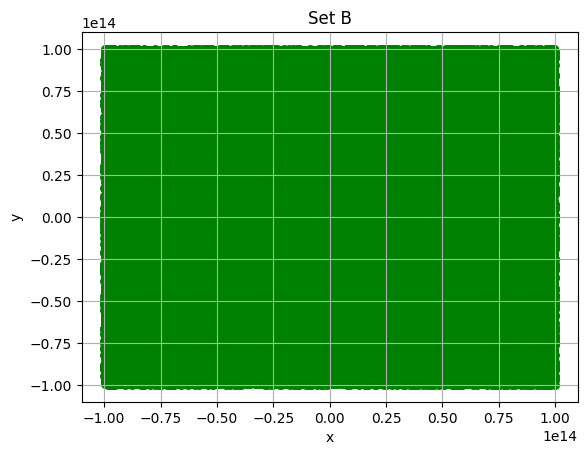

In [171]:
draw_points(points_b, save=True, title='Set B')

In [110]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    from random import random
    from math import pi, sin, cos

    points = []
    sx, sy = O

    for _ in range(n):
        theta = random()*2*pi
        x = sx + R*sin(theta)
        y = sy + R*cos(theta)
        points.append((x, y))

    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [111]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

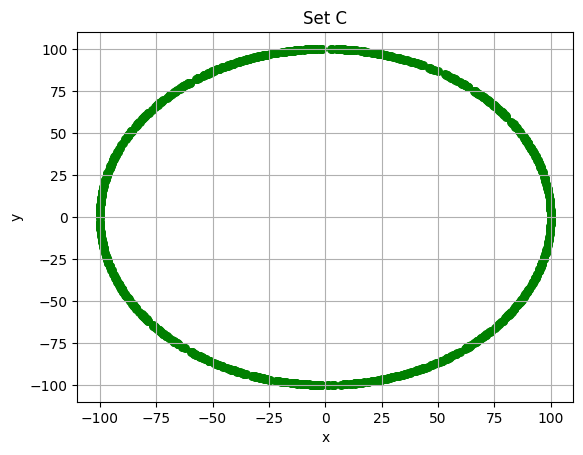

In [172]:
draw_points(points_c, save=True, title='Set C')

In [113]:
def generate_collinear_points(a, b, n = 1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    from random import uniform
    points = []
    ax, ay = a
    bx, by = b
    
    alpha = (by-ay)/(bx-ax)
    beta = ay - alpha*ax
    if ax == bx:
        for _ in range(n): points.append((ax, uniform(-1000,1000)))
    else:
        for _ in range(n):
            x = uniform(-1000,1000)
            y = alpha*x + beta
            points.append((x, y))
    return points

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [114]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

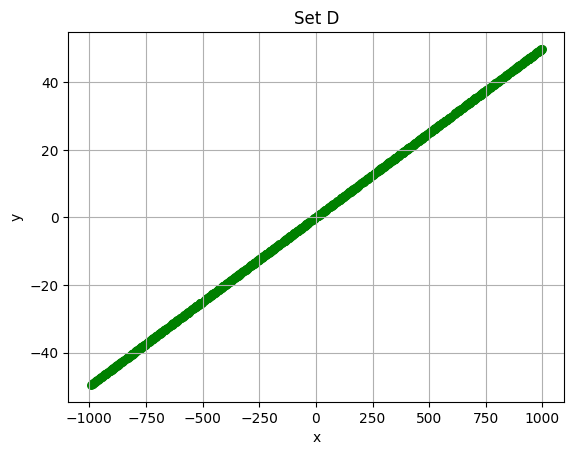

In [173]:
draw_points(points_d, save=True, title='Set D')

Przeprowadź test poprawności powyższych funkcji

In [116]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.273s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

In [117]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    det = ax*by + ay*cx + bx*cy - cx*by - cy*ax - ay*bx
    return det

In [118]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    import numpy as np
    ax, ay = a
    bx, by = b
    cx, cy = c
    matrix = np.array([
        [ax, ay, 1],
        [bx, by, 1],
        [cx, cy, 1]
    ])
    return np.linalg.det(matrix)

In [119]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    det = ((ax-cx) * (by-cy)) - ((ay-cy) * (bx-cx))
    return det

In [120]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    import numpy as np
    ax, ay = a
    bx, by = b
    cx, cy = c
    matrix = np.array([
        [ax-cx, ay-cy],
        [bx-cx, by-cy]
    ])
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [121]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [122]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left_to_the_line, on_the_line, right_to_the_line = [], [], []

    for c in points:
        det = mat_det_func(a,b,c)

        if abs(det) <= eps: on_the_line.append(c)
        elif det > 0: left_to_the_line.append(c)
        else: right_to_the_line.append(c)
        
    return left_to_the_line, on_the_line, right_to_the_line

In [123]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

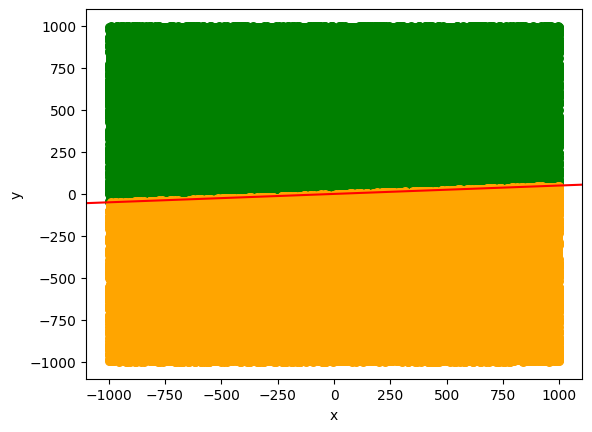

In [124]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

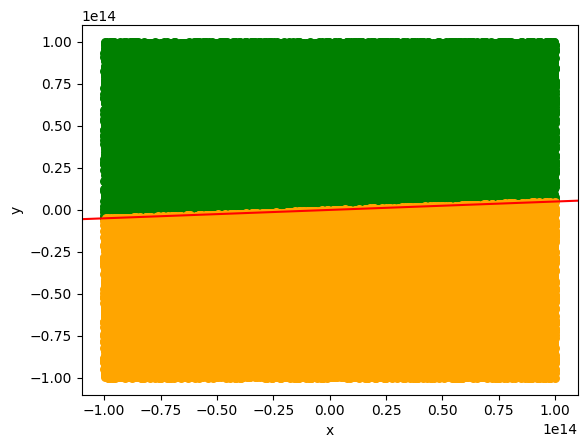

In [125]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

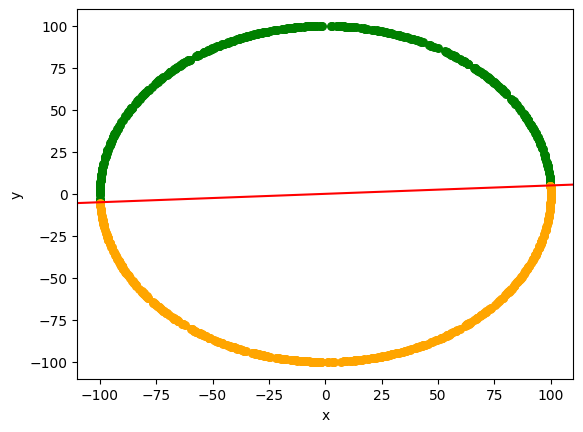

In [126]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

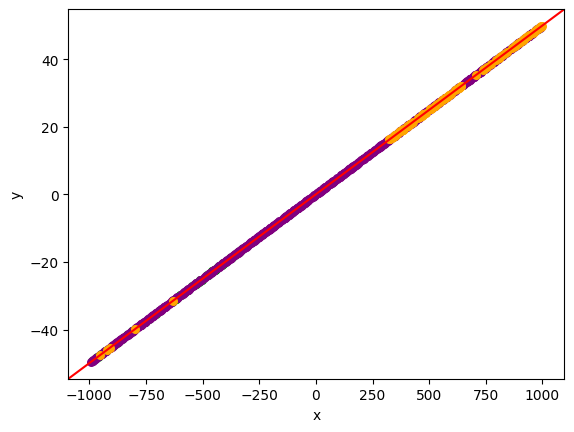

In [127]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [128]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

# Testy przeprowadzone dla każdej dokładności, funkcji i zbioru

In [156]:
epsilon = [0, 10 ** -8, 10 ** -10, 10 ** -12, 10 ** -14]
functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
function_names = ["mat_det_2x2", "mat_det_2x2_lib", "mat_det_3x3", "mat_det_3x3_lib"]
setsA = [(points_a, "float64", "A"), (points_a_float32, "float32", "A")] # 10**5 punktów na przedziale x,y należącym do [-1000,1000]**2
setsB = [(points_b, "float64", "B"), (points_b_float32, "float32", "B")] # 10**5 punktów na przedziale x,y należącym do [-10**14,10**14]**2
setsC = [(points_c, "float64", "C"), (points_c_float32, "float32", "C")] # 1000 punktów na okręgu O = (0,0) i R = 100
setsD = [(points_d, "float64", "D"), (points_d_float32, "float32", "D")] # 1000 punktów na prostej wyznaczonej przez wektor ab, z przedziału x [-1000,1000]

## Obliczenia dla zbioru A

In [163]:
class Summary:

    def __init__(self, left, mid, right, fun, eps, prec, set_n):
        self.left = left
        self.mid = mid
        self.right = right
        self.used_fun = fun
        self.eps = eps
        self.prec = prec
        self.set_n = set_n

    def __repr__(self):
        info1 = f"Ilość punktów po lewej od prostej: {len(self.left)}\nIlość punktów na prostej: {len(self.mid)}\nIlość punktów na prawo od prostej: {len(self.right)}"
        info2 = f"Obliczono dla zbioru {self.set_n} z wykorzystaniem funkcji {self.used_fun}\nEpsilon: {self.eps}\nPrecyzja: {self.prec}"
        return info2 + "\n" + info1 + "\n"

def draw_all(both_prec):

    sums = []

    for set_n, set_prec, letter in both_prec:
        for i in range(4):
            for eps in epsilon:
                pointsLEFT, pointsMID, pointsRIGHT = categorize_points(set_n, a, b, functions[i], eps)
                current_summary = Summary(pointsLEFT, pointsMID, pointsRIGHT,function_names[i],eps,set_prec, letter)
                sums.append(current_summary)
                draw_line(pointsLEFT, pointsMID, pointsRIGHT, title = f"Function: {function_names[i]}\nEpsilon: {eps}\nPrecision: {set_prec}")
                print(current_summary.__repr__())


Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 0
Precyzja: float64
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-08
Precyzja: float64
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-10
Precyzja: float64
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-12
Precyzja: float64
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-14
Precyzja: float64
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od 

/home/krzysztof/PROJECTS/Algorytmy-Geometryczne/bitalg/visualizer/plot/plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 0
Precyzja: float32
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-08
Precyzja: float32
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-10
Precyzja: float32
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-12
Precyzja: float32
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od prostej: 50101

Obliczono dla zbioru A z wykorzystaniem funkcji mat_det_2x2
Epsilon: 1e-14
Precyzja: float32
Ilość punktów po lewej od prostej: 49899
Ilość punktów na prostej: 0
Ilość punktów na prawo od 

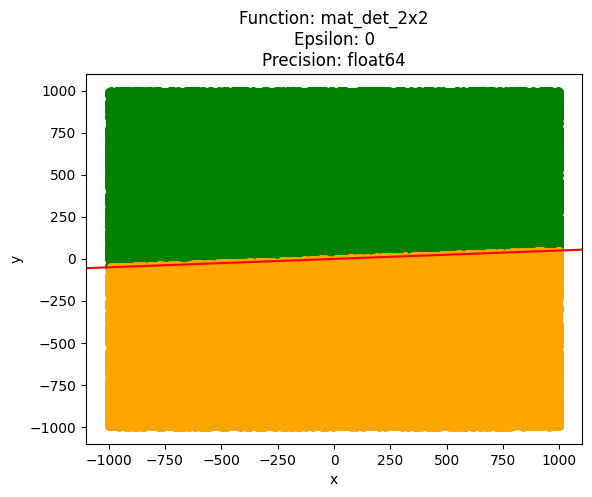

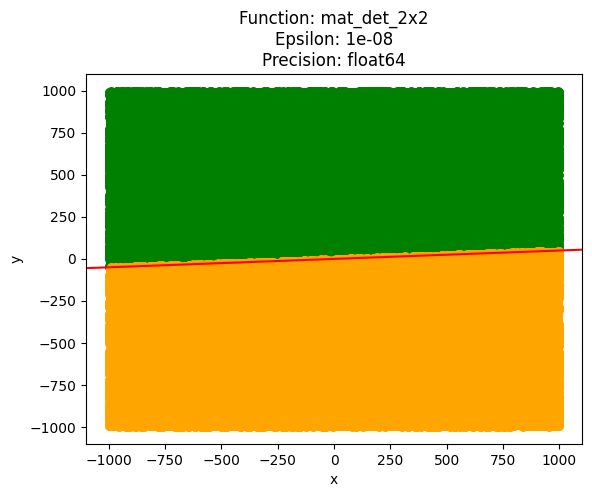

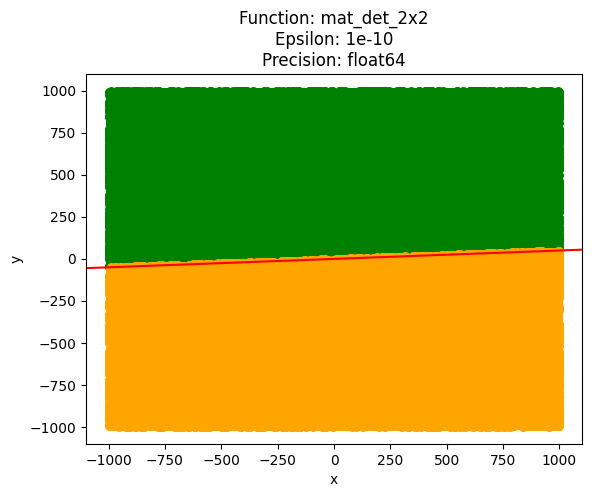

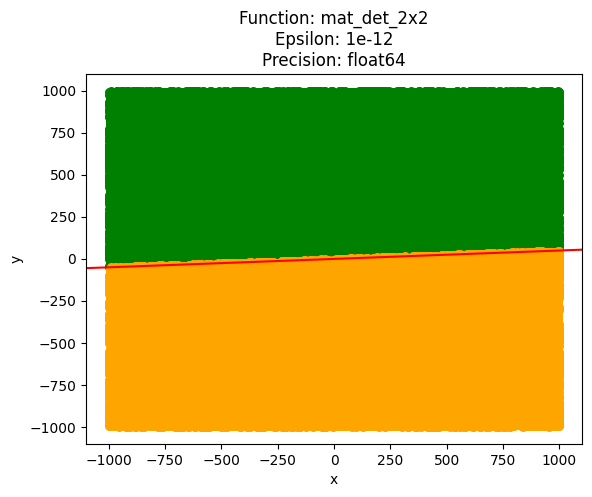

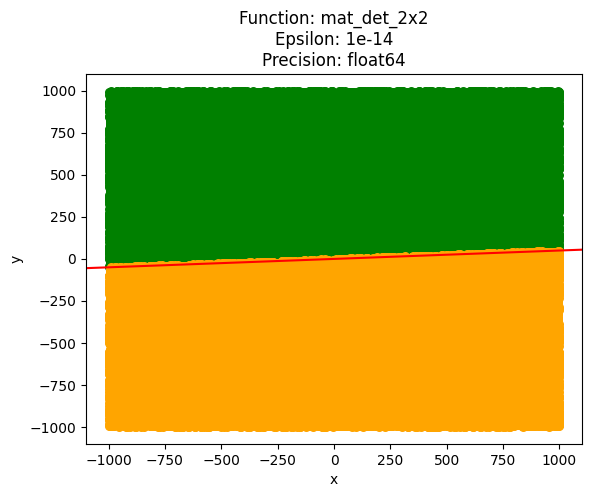

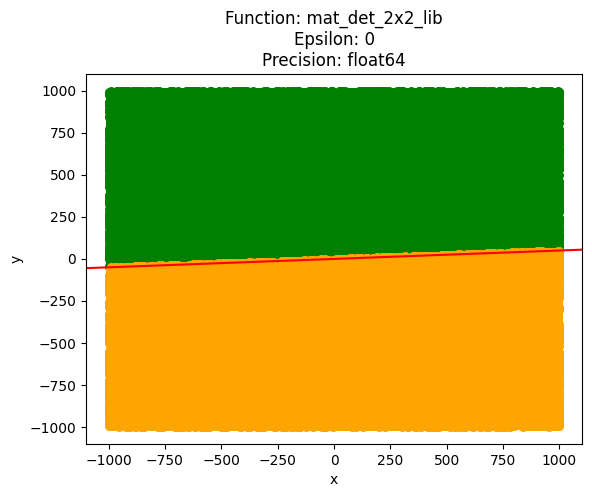

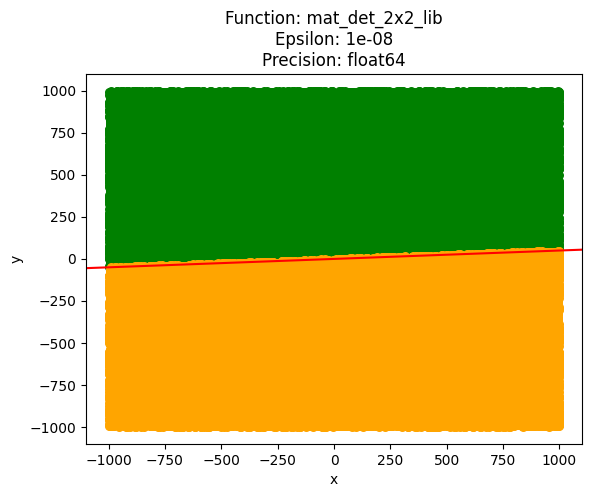

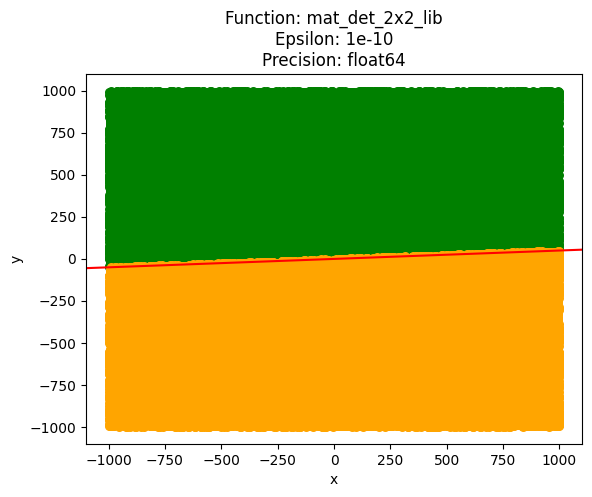

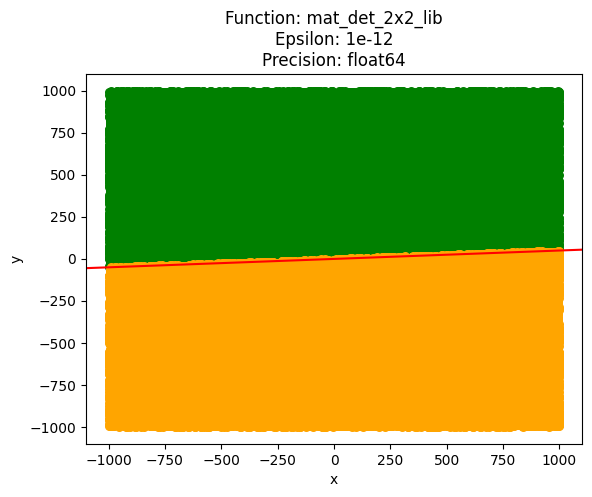

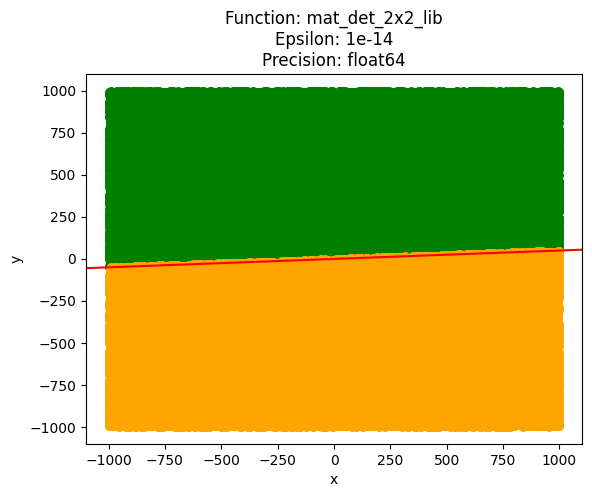

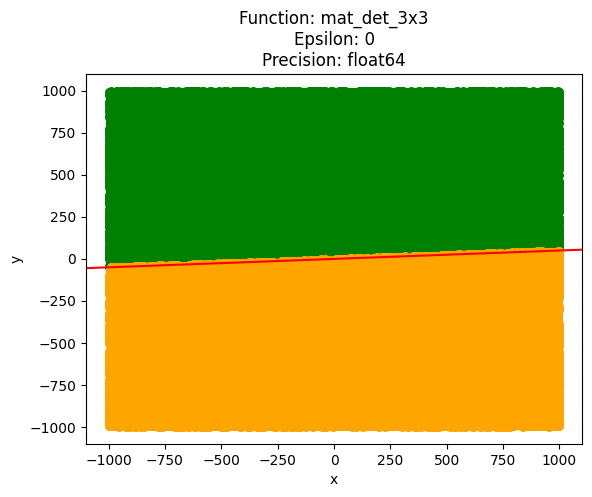

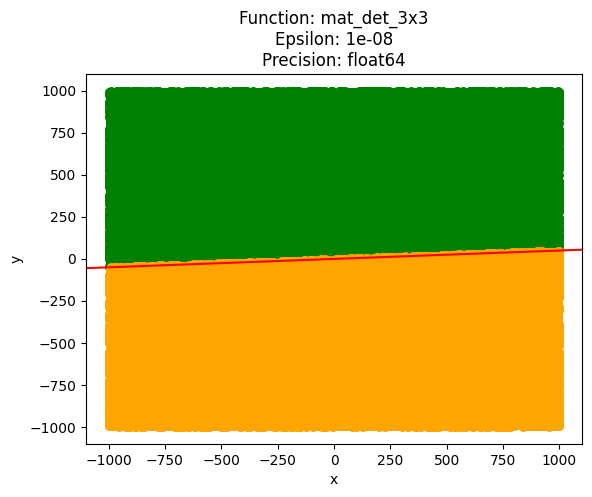

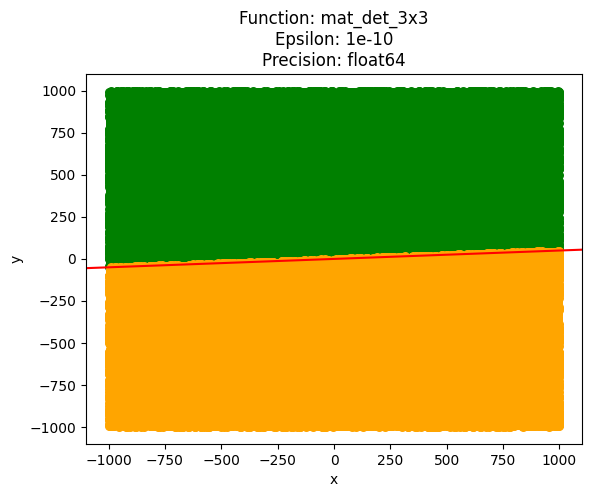

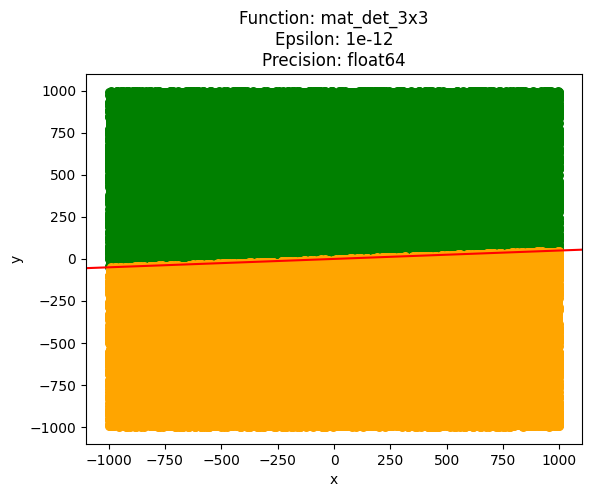

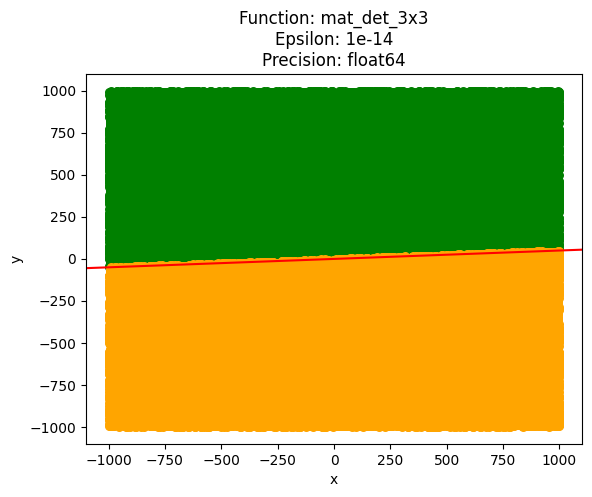

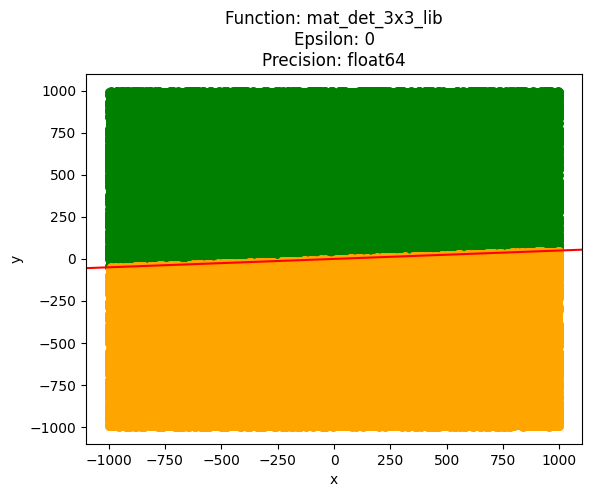

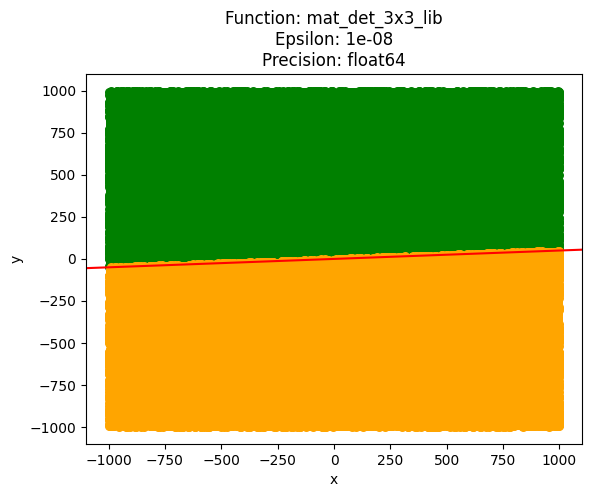

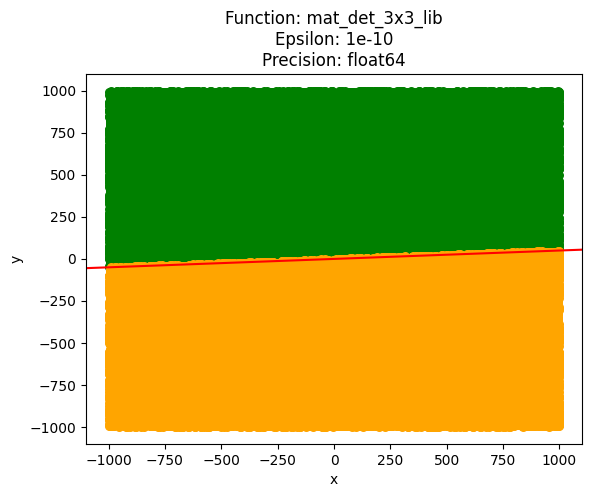

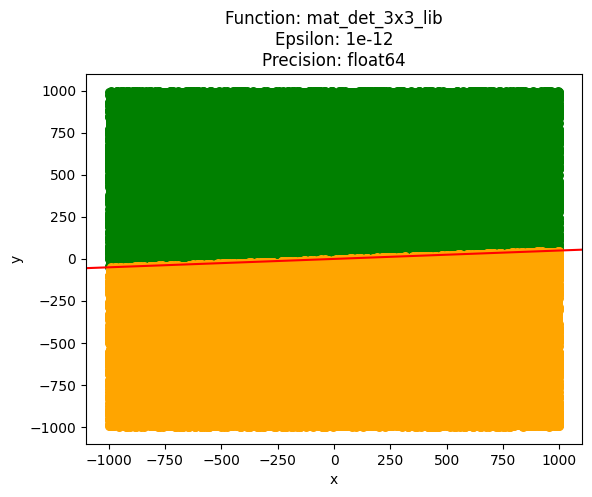

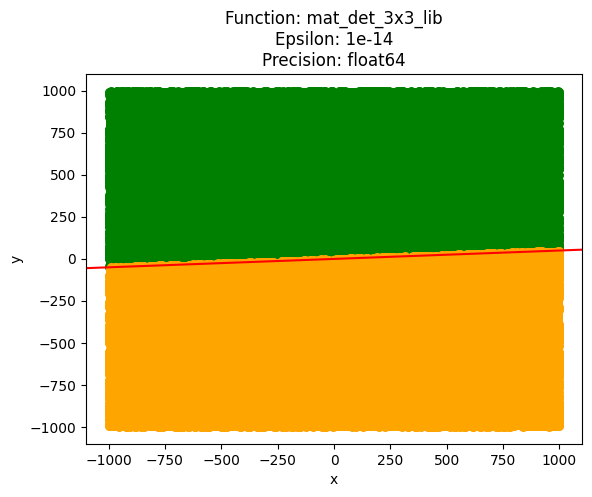

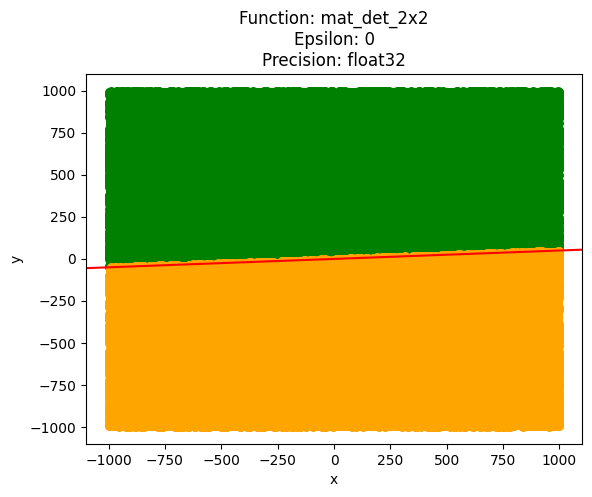

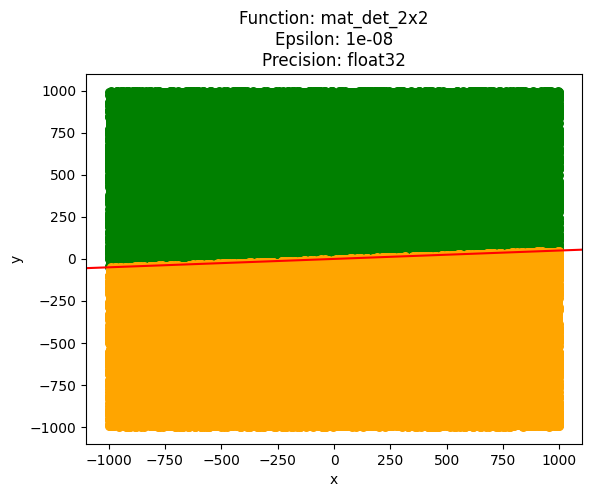

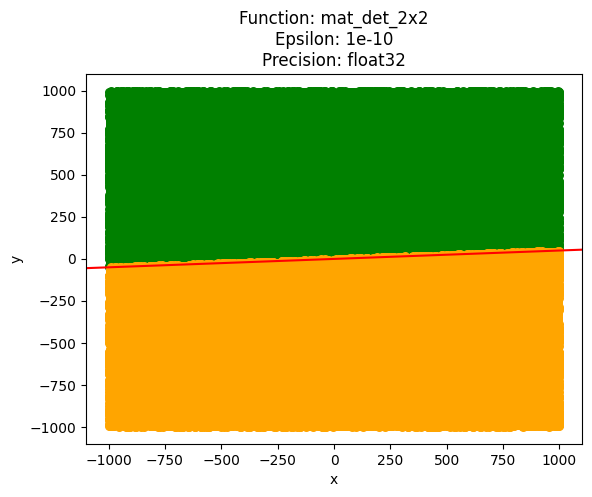

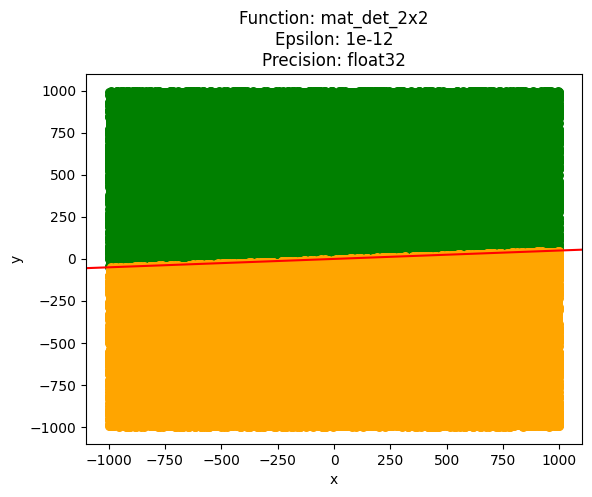

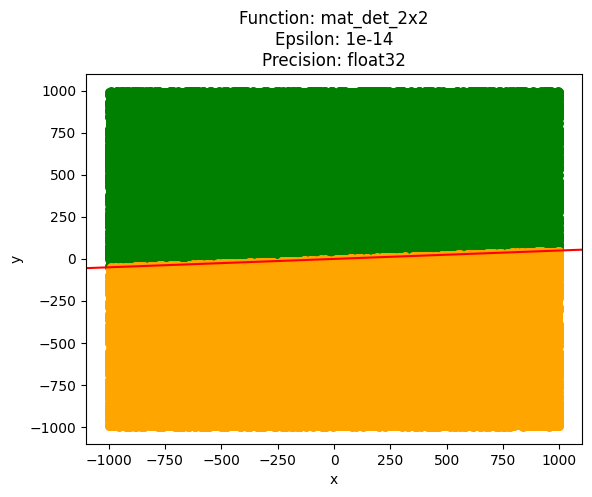

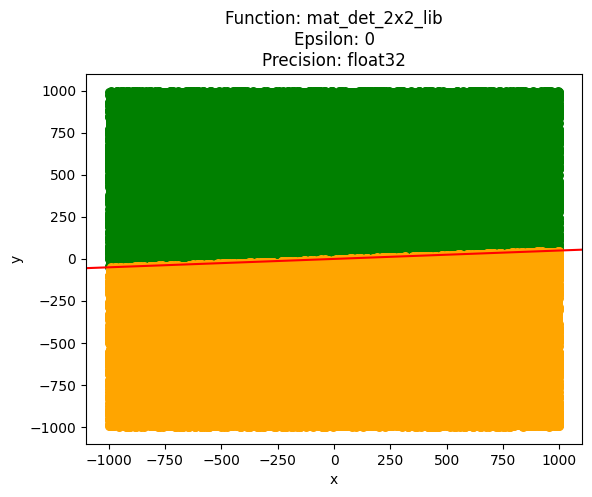

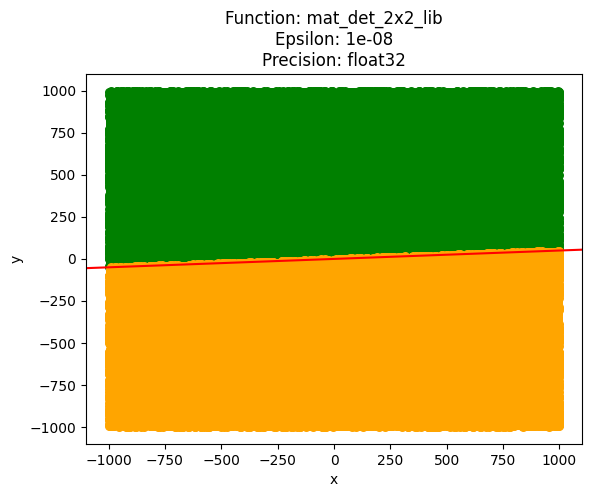

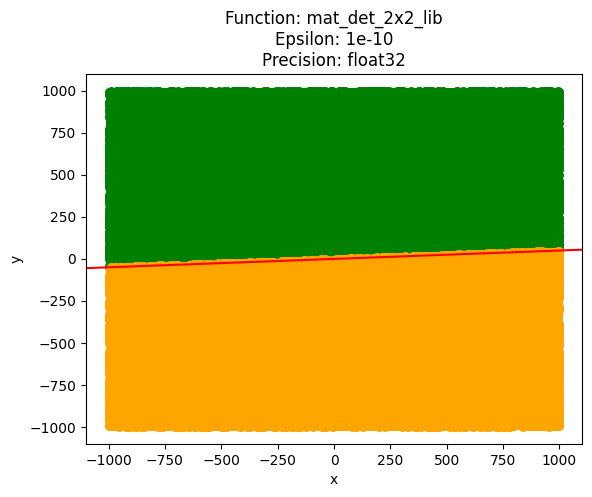

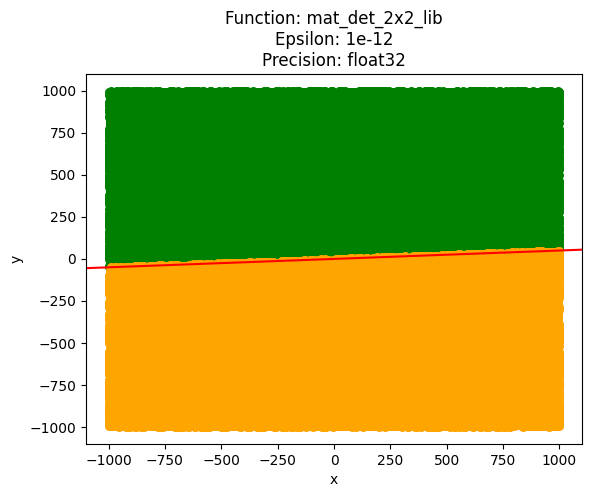

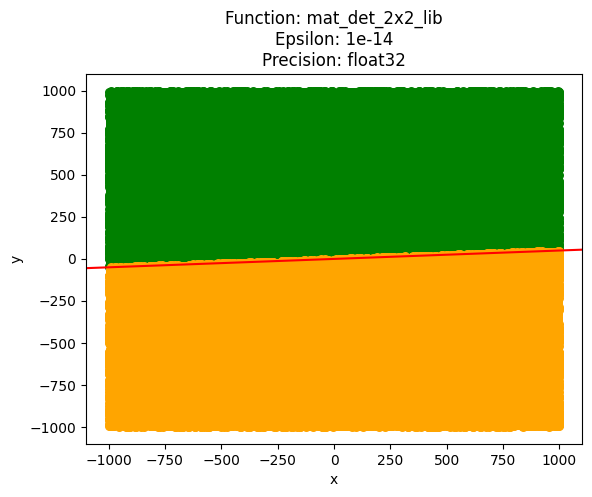

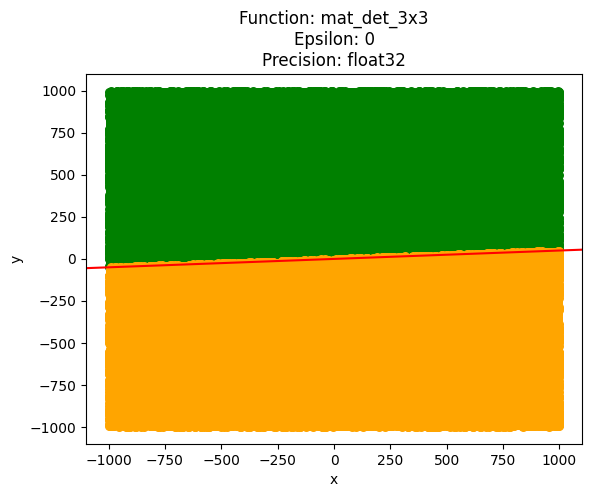

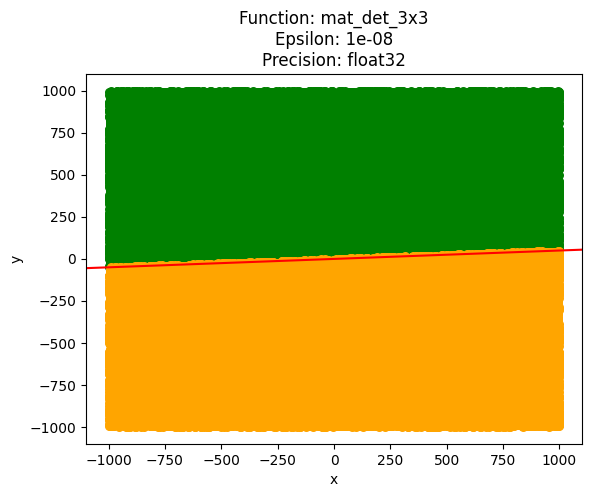

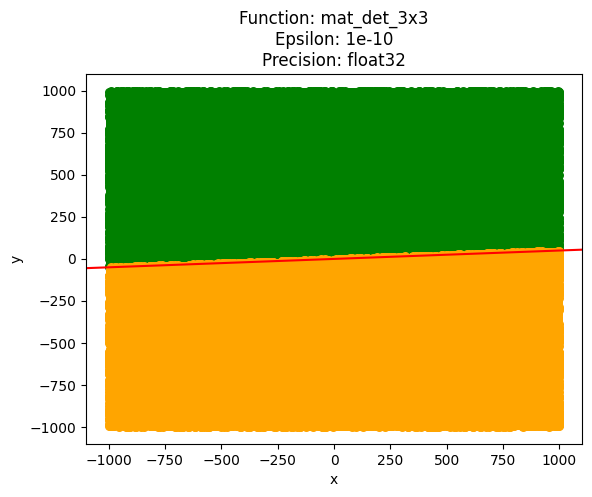

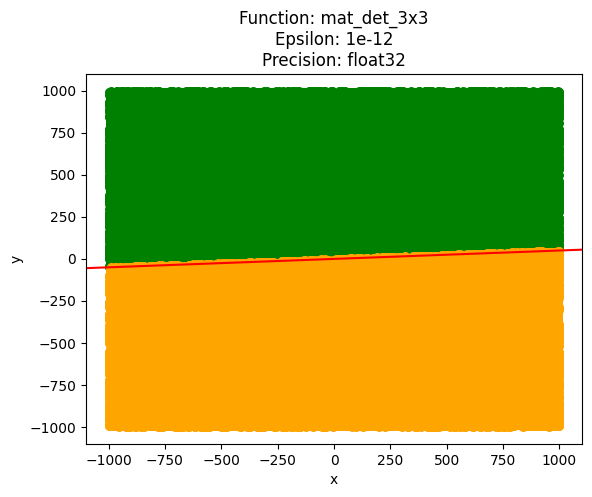

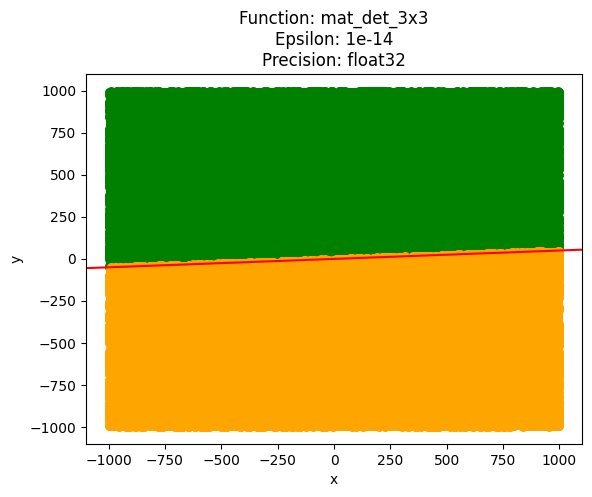

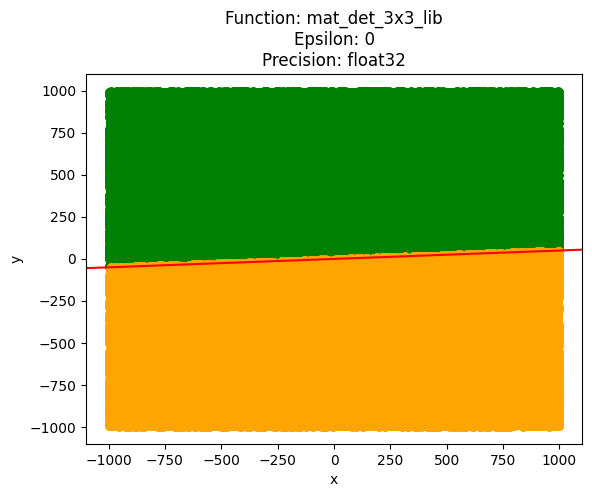

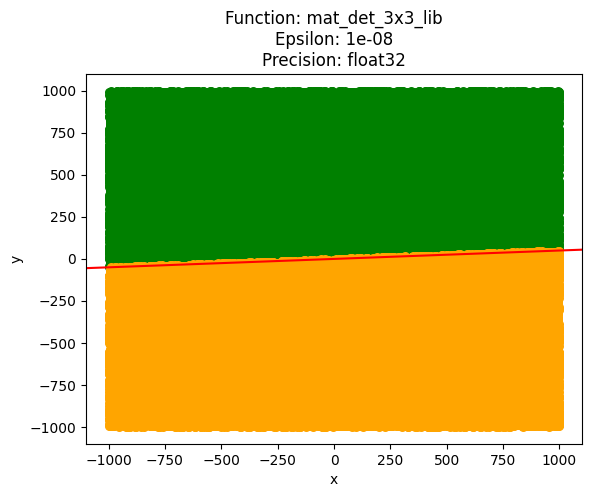

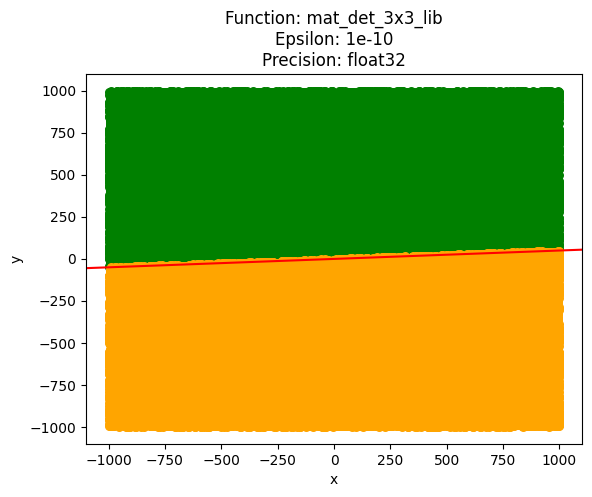

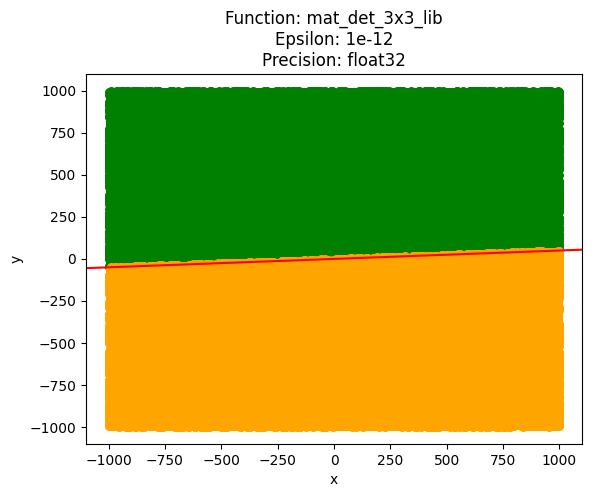

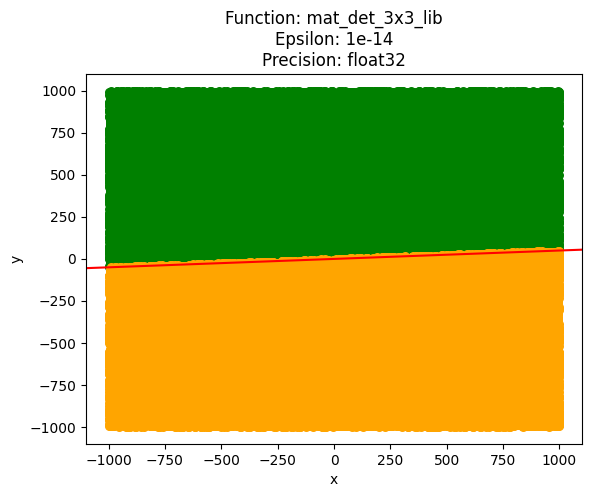

In [164]:
draw_all(setsA)